In [19]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)  #Sesuaikan konfigurasi plot yang akan dibuat

In [2]:
#Read data
df = pd.read_csv(r'D:\MEILYA THE DATA ANALYST\movies.csv')

In [3]:
#######   MARI KITA LAKUKAN DATA CLEANING TERLEBIH DAHULU SEBELUM MELAKUKAN CORRELATION   #######
#Menampilkan data-data teratas

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [4]:
## Melihat adakah Mising Data
## Jika ada missing data isi dengan mean
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [5]:
#Mengisi data yang kosong(NaN) pada kolom budget dan gross dengan 0.0

df['budget'] = df['budget'].fillna(0)
df['gross'] = df['gross'].fillna(0)

In [6]:
df.tail(50)

name     rating      genre  \
7618                                Play the Flute        NaN      Drama   
7619                                    Geolkapseu        NaN     Action   
7620                              Shed of the Dead          R     Comedy   
7621                         The Fighting Preacher         PG     Comedy   
7622                                       Junglee  Not Rated     Action   
7623                                   The Captain        NaN     Action   
7624                                 Total Dhamaal  Not Rated     Action   
7625                              The Untold Story        NaN     Comedy   
7626                            No Manches Frida 2          R     Comedy   
7627                  Line Walker 2: Invisible Spy  Not Rated     Action   
7628                                         Money        NaN      Crime   
7629                    The Ground Beneath My Feet  Not Rated      Drama   
7630                                          Open        NaN      Drama   
7631  The Least of These: The Graham Staines Story      PG-13      Drama   
7632            Saga of Tanya the Evil - The Movie  Not Rated  Animation   
7633                                    Tod@s Caen      PG-13     Comedy   
7634                         My People, My Country        NaN      Drama   
7635                                Alone/Together        NaN      Drama   
7636     The Other Side of Heaven 2: Fire of Faith      PG-13  Adventure   
7637                           India's Most Wanted  Not Rated     Action   
7638        Chasing the Dragon II: Wild Wild Bunch  Not Rated     Action   
7639                            Round of Your Life        NaN     Family   
7640                                     El Coyote          R     Action   
7641                      By Light of Desert Night        NaN      Drama   
7642                              A Brother's Love        NaN      Drama   
7643                                         Tenet      PG-13     Action   
7644                             Wonder Woman 1984      PG-13     Action   
7645                                 Birds of Prey          R     Action   
7646                             The Invisible Man          R      Drama   
7647                                        Onward         PG  Animation   
7648                             Bad Boys for Life          R     Action   
7649                            Sonic the Hedgehog         PG     Action   
7650                                      Dolittle         PG  Adventure   
7651                          The Call of the Wild         PG  Adventure   
7652                             The Eight Hundred  Not Rated     Action   
7653                                    The Quarry          R      Crime   
7654                      Star Trek First Frontier        NaN     Sci-Fi   
7655                         Legend of Deification      TV-PG  Animation   
7656                                         Tulsa      PG-13     Comedy   
7657                                          Leap        NaN      Drama   
7658                     Black Wall Street Burning          R      Drama   
7659                                     I Am Fear  Not Rated     Horror   
7660                              Aloha Surf Hotel        NaN     Comedy   
7661                              Love by Drowning          R      Drama   
7662                                 The Robinsons        NaN     Action   
7663                                  More to Life        NaN      Drama   
7664                                   Dream Round        NaN     Comedy   
7665                                 Saving Mbango        NaN      Drama   
7666                                  It's Just Us        NaN      Drama   
7667                                     Tee em el        NaN     Horror   

      year                            released  score     votes  \
7618  2019       March 1, 2019 (United States)    6.9      34.0   
7619  2019           May 9, 2019 (S

In [30]:
#Pecah negara pada released menjadi kolom baru

df['yearcorrect'] = df['released'].str.split('(', expand=True)

df.head(20)

name rating      genre  year  \
0                                      The Shining      R      Drama  1980   
1                                  The Blue Lagoon      R  Adventure  1980   
2   Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                        Airplane!     PG     Comedy  1980   
4                                       Caddyshack      R     Comedy  1980   
5                                  Friday the 13th      R     Horror  1980   
6                               The Blues Brothers      R     Action  1980   
7                                      Raging Bull      R  Biography  1980   
8                                      Superman II     PG     Action  1980   
9                                  The Long Riders      R  Biography  1980   
10                           Any Which Way You Can     PG     Action  1980   
11                          The Gods Must Be Crazy     PG  Adventure  1980   
12                                          Popeye     PG  Adventure  1980   
13                                 Ordinary People      R      Drama  1980   
14                                 Dressed to Kill      R      Crime  1980   
15                               Somewhere in Time     PG      Drama  1980   
16                                            Fame      R      Drama  1980   
17                                          9 to 5     PG     Comedy  1980   
18                                         The Fog      R     Horror  1980   
19                                      Stir Crazy      R     Comedy  1980   

                              released  score      votes            director  \
0        June 13, 1980 (United States)    8.4   927000.0     Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0      Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0      Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0        Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0        Harold Ramis   
5          May 9, 1980 (United States)    6.4   123000.0  Sean S. Cunningham   
6        June 20, 1980 (United States)    7.9   188000.0         John Landis   
7    December 19, 1980 (United States)    8.2   330000.0     Martin Scorsese   
8        June 19, 1981 (United States)    6.8   101000.0      Richard Lester   
9         May 16, 1980 (United States)    7.0    10000.0         Walter Hill   
10   December 17, 1980 (United States)    6.1    18000.0      Buddy Van Horn   
11    October 26, 1984 (United States)    7.3    54000.0           Jamie Uys   
12   December 12, 1980 (United States)    5.3    30000.0       Robert Altman   
13  September 19, 1980 (United States)    7.7    49000.0      Robert Redford   
14       July 25, 1980 (United States)    7.1    37000.0      Brian De Palma   
15     October 3, 1980 (United States)    7.2    27000.0      Jeannot Szwarc   
16        May 16, 1980 (United States)    6.6    21000.0         Alan Parker   
17   December 19, 1980 (United States)    6.9    29000.0       Colin Higgins   
18    February 8, 1980 (United States)    6.8    66000.0      John Carpenter   
19   December 12, 1980 (United States)    6.8    26000.0      Sidney Poitier   

                     writer               star         country      budget  \
0              Stephen King     Jack Nicholson  United Kingdom  19000000.0   
1   Henry De Vere Stacpoole     Brooke Shields   United States   4500000.0   
2            Leigh Brackett        Mark Hamill   United States  18000000.0   
3              Jim Abrahams        Robert Hays   United States   3500000.0   
4        Brian Doyle-Murray        Chevy Chase   United States   6000000.0   
5             Victor Miller       Betsy Palmer   United States    550000.0   
6               Dan Aykroyd       John Belushi   United States  27000000.0   
7              Jake LaMotta     Robert De Niro   United States  18000000.0   
8              Jerry Sie

In [18]:
#Melihat tipe data setiap kolom
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross         int32
company      object
runtime     float64
dtype: object

In [37]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [14]:
#Mengubah tipe data gross menjadi int karena pada saat tipe data float nilai gross tidak valid(misal : 12345+6)

df = df.astype({'gross':'int'})

In [15]:
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country      budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000.0   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000.0   
2              Leigh Brackett       Mark Hamill   United States  18000000.0   
3                Jim Abrahams       Robert Hays   United States   3500000.0   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000.0   
...                       ...               ...             ...         ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000.0   
7664              Lisa Huston  Michael Saquella   United States         0.0   
7665             Lynno Lovert      Onyama Laura   United States     58750.0   
7666            James Randall     Christina Roz   United States     15000.0   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         0.0   

          gross                    company  runtime  
0      46998772               Warner Bros.    146.0  
1      58853106          Columbia Pictures    104.0  
2     538375067                  Lucasfilm    124.0  
3      83453539         Paramount Pictures     88.0  
4      39846344             Orion Pictures     98.0  
...         ...                        ...      ...  
7663          0                        NaN     90.0  
7664          0  Cactus Blue Entertainment     90.0  
7665          0           Embi Productions      NaN  
7666          0                        NaN    120.0  
7667          0                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [34]:
#Melihat semua isi rows
pd.set_option('display.max_rows', None)

In [35]:
#Menghapus duplikasi
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

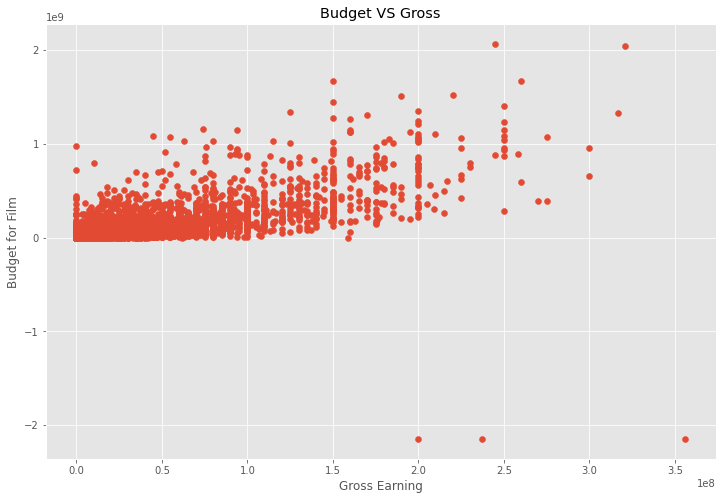

In [39]:
#Korelasi Tingginya Budget
#Scatter Plot dengan Budget VS Gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget VS Gross')
plt.xlabel('Gross Earning')
plt.ylabel('Budget for Film')

plt.show()

In [40]:
#Menampilkan data dengan budget terbesar

df.head()

name rating      genre  year  \
6663  Star Wars: Episode VII - The Force Awakens  PG-13     Action  2015   
7244                      Avengers: Infinity War  PG-13     Action  2018   
7480                               The Lion King     PG  Animation  2019   
6653                              Jurassic World  PG-13     Action  2015   
6043                                The Avengers  PG-13     Action  2012   

                               released  score      votes         director  \
6663  December 18, 2015 (United States)    7.8   876000.0      J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0    Anthony Russo   
7480      July 19, 2019 (United States)    6.9   222000.0      Jon Favreau   
6653      June 12, 2015 (United States)    7.0   593000.0  Colin Trevorrow   
6043        May 4, 2012 (United States)    8.0  1300000.0      Joss Whedon   

                  writer               star        country       budget  \
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000.0   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000.0   
7480      Jeff Nathanson      Donald Glover  United States  260000000.0   
6653          Rick Jaffa        Chris Pratt  United States  150000000.0   
6043         Joss Whedon  Robert Downey Jr.  United States  220000000.0   

           gross               company  runtime         yearcorrect  
6663  2069521700             Lucasfilm    138.0  December 18, 2015   
7244  2048359754        Marvel Studios    149.0     April 27, 2018   
7480  1670727580  Walt Disney Pictures    118.0      July 19, 2019   
6653  1670516444    Universal Pictures    124.0      June 12, 2015   
6043  1518815515        Marvel Studios    143.0        May 4, 2012

<AxesSubplot:xlabel='budget', ylabel='gross'>

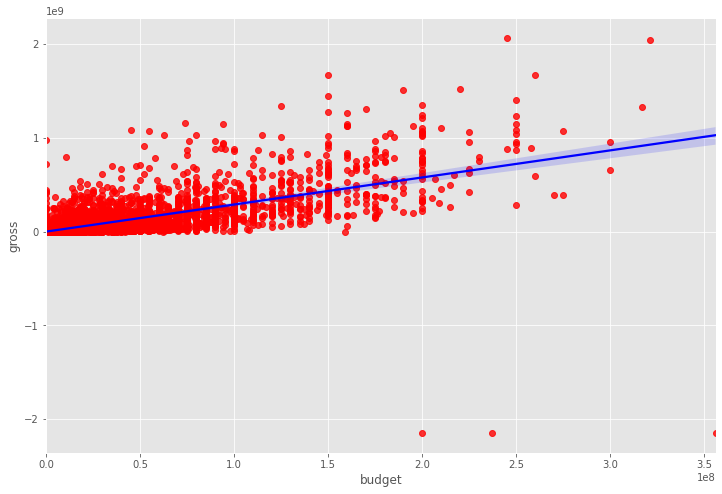

In [41]:
#Plot Budget vs Gross menggunakan seaborn
#Line biru menunjukkan korelasi antara budget dan gross
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [43]:
#Melihat korelasinya
df.corr(method='pearson') #Gunakan method (pearson, kendall, spearman )

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.309212  0.256331  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.169406  0.399451
votes    0.222945  0.409182  1.000000  0.486862  0.573889  0.309212
budget   0.309212  0.055665  0.486862  1.000000  0.687124  0.269510
gross    0.256331  0.169406  0.573889  0.687124  1.000000  0.204177
runtime  0.120811  0.399451  0.309212  0.269510  0.204177  1.000000

<function matplotlib.pyplot.show(close=None, block=None)>

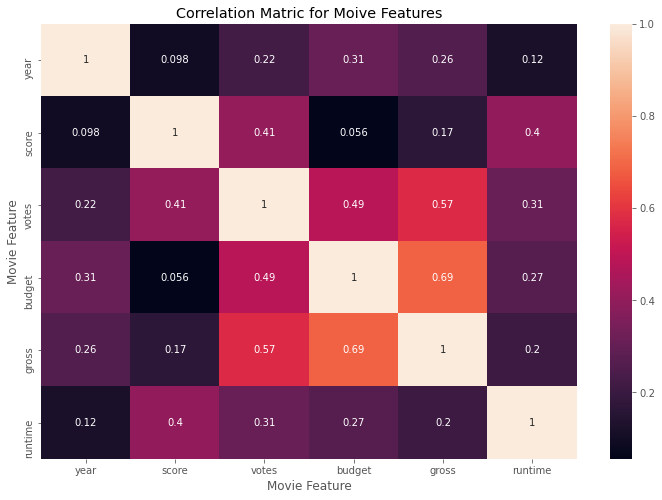

In [45]:
#Korelasi tertinggi antara budget dan gross

correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Moive Features')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')

plt.show

In [46]:
#Lihat Company
df.head()

name rating      genre  year  \
6663  Star Wars: Episode VII - The Force Awakens  PG-13     Action  2015   
7244                      Avengers: Infinity War  PG-13     Action  2018   
7480                               The Lion King     PG  Animation  2019   
6653                              Jurassic World  PG-13     Action  2015   
6043                                The Avengers  PG-13     Action  2012   

                               released  score      votes         director  \
6663  December 18, 2015 (United States)    7.8   876000.0      J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0    Anthony Russo   
7480      July 19, 2019 (United States)    6.9   222000.0      Jon Favreau   
6653      June 12, 2015 (United States)    7.0   593000.0  Colin Trevorrow   
6043        May 4, 2012 (United States)    8.0  1300000.0      Joss Whedon   

                  writer               star        country       budget  \
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000.0   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000.0   
7480      Jeff Nathanson      Donald Glover  United States  260000000.0   
6653          Rick Jaffa        Chris Pratt  United States  150000000.0   
6043         Joss Whedon  Robert Downey Jr.  United States  220000000.0   

           gross               company  runtime         yearcorrect  
6663  2069521700             Lucasfilm    138.0  December 18, 2015   
7244  2048359754        Marvel Studios    149.0     April 27, 2018   
7480  1670727580  Walt Disney Pictures    118.0      July 19, 2019   
6653  1670516444    Universal Pictures    124.0      June 12, 2015   
6043  1518815515        Marvel Studios    143.0        May 4, 2012

In [51]:
#Mengubah semua kolom yang memiliki tipe data objek menjadi numerik untuk melihat korelasi antar semua kolom
#Namun data kolom yang dirubah tipe datanya menjadi numeric tetap sesuai dengan tipe data sebelumnya
#Contohnya kolom company punya beberapa data yang bernama Marvel Studios, 
#setelah tipe datanya diubah menjadi numeric maka beberapa data bernama Marvel Studios itu akan menjadi 1606

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

name  rating  genre  year  released  score      votes  director  writer  \
6663  5144       5      0  2015       698    7.8   876000.0      1125    2550   
7244   536       5      0  2018       192    8.4   897000.0       162     743   
7480  6194       4      2  2019      1488    6.9   222000.0      1455    1919   
6653  2969       5      0  2015      1704    7.0   593000.0       517    3568   
6043  5502       5      0  2012      2472    8.0  1300000.0      1517    2314   
6646  2145       5      0  2015       221    7.1   370000.0      1189     706   
7494  2131       4      2  2019      2676    6.8   148000.0       432    1950   
6644   534       5      0  2015      2235    7.3   777000.0      1517    2314   
7247   791       5      0  2018       959    7.3   661000.0      2457    3795   
5845  2407       5      1  2011      1445    8.1   790000.0       679    4052   
7075  5145       5      0  2017       661    7.0   581000.0      2282    3518   
7271  2970       5      0  2018      1799    6.2   277000.0      1121    1093   
6262  2130       4      2  2013      2715    7.4   585000.0       432    1950   
7072   657       4      7  2017      2022    7.1   283000.0       250    4000   
7281  2760       4      2  2018      1729    7.6   263000.0       303     491   
7055  5833       5      0  2017        61    6.6   214000.0       835    1431   
6244  2823       5      0  2013      2449    7.1   779000.0      2543    1174   
6688  3622       4      2  2015      1395    6.4   218000.0      1639     534   
6846  1056       5      0  2016      2488    7.8   694000.0       162     743   
7250   474       5      0  2018       748    6.9   404000.0      1189     990   
4245  6221       5      0  2003       680    8.9  1700000.0      2193    1745   
7458  5084       5      0  2019      1501    7.5   359000.0      1463     704   
7456  1061       5      0  2019      2213    6.8   478000.0       147     255   
5878  6968       5      0  2011      1870    6.2   390000.0      1886    1237   
6059  4951       5      0  2012      2804    7.7   642000.0      2476    3125   
6494  6967       5      0  2014      1849    5.6   302000.0      1886    1237   
2448  6194       1      2  1994      1811    8.5   970000.0      2415    1702   
6047  5726       5      0  2012      1510    8.4  1600000.0       483    2265   
7463  5141       5      0  2019       731    6.5   394000.0      1125     714   
7450  2930       6      5  2019      3062    8.4  1000000.0      2767    4248   
7488  6949       1      2  2019      1787    7.7   217000.0      1509    2158   
5685  6948       1      2  2010      1752    8.2   776000.0      1678    2158   
4852  4258       5      0  2006      1645    7.3   668000.0       996    4147   
6869  4616       5      0  2016       673    7.8   572000.0       912     717   
7481   290       4      1  2019      2394    6.9   239000.0      1031    2078   
5860  4261       5      0  2011      2350    6.6   492000.0      2341    4147   
7140  1552       4      2  2017      1896    6.3   119000.0      1639     758   
2245  2967       5      0  1993      1689    8.1   894000.0      2660    2931   
6908  1978       4      2  2016      1744    7.3   250000.0       124     215   
3451  5138       4      0  1999      2318    6.5   748000.0       963    1472   
5667   300       4      1  2010      2182    6.4   392000.0      2745    2607   
6863  7504       4      2  2016      2175    8.0   450000.0       362     576   
6045  6001       5      1  2012       651    7.8   773000.0      2193    1359   
3843  2412       4      1  2001      2593    7.6   685000.0       435    1741   
5243  5725       5      0  2008      1476    9.0  2400000.0       483    2265   
5652  2406       5      1  2010      2620    7.7   495000.0       679    4052   
6311  1551       4      2  2013      1599    7.3   377000.0      2237     758   
6905  6108       4      1  2016        72    7.4   264000.0      1455    2362   
7051  2956       5      0  2017      

<function matplotlib.pyplot.show(close=None, block=None)>

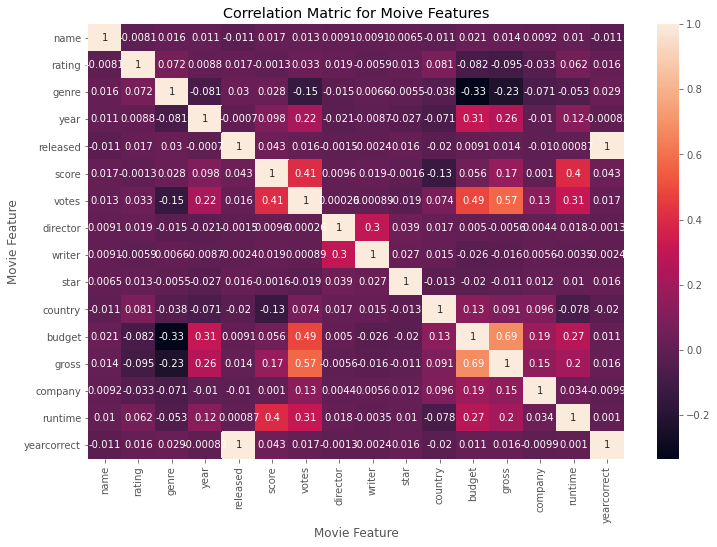

In [52]:
#Melihat korelasi semua kolom dengan mengubah correlation_matrix = df_numerized.corr(method='pearson')
#yang awalnya adalah correlation_matrix = df.corr(method='pearson') karena semua tipe datanya sudah dirubah menjadi numeric
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Moive Features')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')

plt.show

In [53]:
#Melihat korelasinya dengan tabel
df_numerized.corr()

name    rating     genre      year  released     score  \
name         1.000000 -0.008069  0.016355  0.011453 -0.011311  0.017097   
rating      -0.008069  1.000000  0.072423  0.008779  0.016613 -0.001314   
genre        0.016355  0.072423  1.000000 -0.081261  0.029822  0.027965   
year         0.011453  0.008779 -0.081261  1.000000 -0.000695  0.097995   
released    -0.011311  0.016613  0.029822 -0.000695  1.000000  0.042788   
score        0.017097 -0.001314  0.027965  0.097995  0.042788  1.000000   
votes        0.013088  0.033225 -0.145307  0.222945  0.016097  0.409182   
director     0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.009559   
writer       0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.019416   
star         0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.001609   
country     -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133348   
budget       0.020548 -0.081939 -0.334021  0.309212  0.009145  0.055665   
gross        0.013895 -0.095355 -0.229534  0.256331  0.014154  0.169406   
company      0.009211 -0.032943 -0.071067 -0.010431 -0.010474  0.001030   
runtime      0.010392  0.062145 -0.052711  0.120811  0.000868  0.399451   
yearcorrect -0.011223  0.015735  0.029039 -0.000832  0.999912  0.042918   

                votes  director    writer      star   country    budget  \
name         0.013088  0.009079  0.009081  0.006472 -0.010737  0.020548   
rating       0.033225  0.019483 -0.005921  0.013405  0.081244 -0.081939   
genre       -0.145307 -0.015258  0.006567 -0.005477 -0.037615 -0.334021   
year         0.222945 -0.020795 -0.008656 -0.027242 -0.070938  0.309212   
released     0.016097 -0.001478 -0.002404  0.015777 -0.020427  0.009145   
score        0.409182  0.009559  0.019416 -0.001609 -0.133348  0.055665   
votes        1.000000  0.000260  0.000892 -0.019282  0.073625  0.486862   
director     0.000260  1.000000  0.299067  0.039234  0.017490  0.004976   
writer       0.000892  0.299067  1.000000  0.027245  0.015343 -0.025911   
star        -0.019282  0.039234  0.027245  1.000000 -0.012998 -0.019952   
country      0.073625  0.017490  0.015343 -0.012998  1.000000  0.131720   
budget       0.486862  0.004976 -0.025911 -0.019952  0.131720  1.000000   
gross        0.573889 -0.005615 -0.015602 -0.010628  0.091404  0.687124   
company      0.133204  0.004404  0.005646  0.012442  0.095548  0.186474   
runtime      0.309212  0.017624 -0.003511  0.010174 -0.078412  0.269510   
yearcorrect  0.017111 -0.001275 -0.002421  0.015597 -0.020063  0.010643   

                gross   company   runtime  yearcorrect  
name         0.013895  0.009211  0.010392    -0.011223  
rating      -0.095355 -0.032943  0.062145     0.015735  
genre       -0.229534 -0.071067 -0.052711     0.029039  
year         0.256331 -0.010431  0.120811    -0.000832  
released     0.014154 -0.010474  0.000868     0.999912  
score        0.169406  0.001030  0.399451     0.042918  
votes        0.573889  0.133204  0.309212     0.017111  
director    -0.005615  0.004404  0.017624    -0.001275  
writer      -0.015602  0.005646 -0.003511    -0.002421  
star        -0.010628  0.012442  0.010174     0.015597  
country      0.091404  0.095548 -0.078412    -0.020063  
budget       0.687124  0.186474  0.269510     0.010643  
gross        1.000000  0.148722  0.204177     0.015758  
company      0.148722  1.000000  0.034402    -0.009933  
runtime      0.204177  0.034402  1.000000     0.000997  
yearcorrect  0.015758 -0.009933  0.000997     1.000000

In [54]:
#Melihat korelasi per kolom
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.013895
             company        0.009211
             runtime        0.010392
             yearcorrect   -0.011223
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score         -0.001314
             votes          0.033225
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [55]:
#Melihat korelasi dengan mengurutkannya/langsung antar kolom dengan kolom
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.334021
budget       genre         -0.334021
genre        gross         -0.229534
gross        genre         -0.229534
genre        votes         -0.145307
votes        genre         -0.145307
country      score         -0.133348
score        country       -0.133348
rating       gross         -0.095355
gross        rating        -0.095355
budget       rating        -0.081939
rating       budget        -0.081939
genre        year          -0.081261
year         genre         -0.081261
runtime      country       -0.078412
country      runtime       -0.078412
genre        company       -0.071067
company      genre         -0.071067
year         country       -0.070938
country      year          -0.070938
runtime      genre         -0.052711
genre        runtime       -0.052711
             country       -0.037615
country      genre         -0.037615
rating       company       -0.032943
company      rating        -0.032943
star         year          -0.027242
y

In [56]:
#Mencari korelasi > 0.5 dengan sorted pairs

high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross        votes          0.573889
votes        gross          0.573889
gross        budget         0.687124
budget       gross          0.687124
released     yearcorrect    0.999912
yearcorrect  released       0.999912
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
#Kesimpulan
#Votes dan budget memiliki korelasi tertinggi kepada pendapatan gross
#Company memiliki korelasi rendah